In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
import numpy as np
import ttvfast
from bounce import ttvfaststate
from bounce import driver
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Simplest Observation class possible. Replaces observations.py for now.
#Later to be Observation_TTV subclass of Observation.
class Obs(object):
    def __init__(self, times, errors):
        self.times = times
        self.errors = errors

# Set up fake observations with random error. Need params for system...

Order of params, all angles in degrees: mass, P, e, i, Omega, pomega, M

In [4]:
params_true_shifted = [
        0.00002878248, 10.9233301885, 0.0559950818813, 90.9205089025, 0.100354154645, 181.980514569, 90.4742591356,
        0.00061895914, 22.2663975745, 0.0567178996576, 92.4016920156, 0.462146380355, 1.65282682862, -108.441772505]

In [5]:
#All of this could be moved to Observation_TTV subclass where 
#generate_fake_Obs() takes ttvfastsettings, stellarmass and params.
ttvfastsettings = [-1045-5.5, 0.54, 1697.9, 2, 0]
planet1 = ttvfast.models.Planet(*params_true_shifted[:7])
planet2 = ttvfast.models.Planet(*params_true_shifted[7:])
stellar_mass = 0.95573417954
planets = [planet1, planet2]
results = ttvfast.ttvfast(planets, stellar_mass, ttvfastsettings[0], ttvfastsettings[1], ttvfastsettings[2])
integer_indices, epochs, times, rsky, vsky = results["positions"]
t1_times = []
t2_times = []
count = 0
for i in range(len(times)):
    if(integer_indices[i]==0):
        if( not np.isclose(times[i],-2.0)):
            t1_times.append(times[i])
            count +=1
        else:
            break
    else:
        t2_times.append(times[i])
times_true = t1_times

# We can plot the TTV directly from the times.

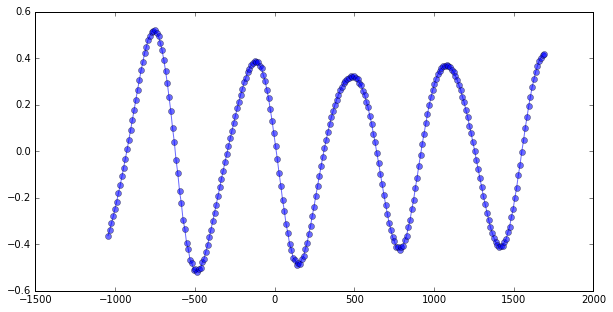

In [6]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ax.plot(*driver.ttv_from_times(times_true), alpha=0.58, color="blue", marker='o')

In [7]:
#Lastly, create the observation class desired, ultimately will have error as argument.
modified_times = np.asarray(times_true)+(np.random.normal(0,1.e-2))
error_model = np.ones(len(times_true))*1.e-2
obs = Obs(modified_times, error_model)

# Given an instance of ttvfaststate.py we only need the following.

In [8]:
np.random.seed(103)
example_params = params_true_shifted * np.random.normal(1., 0.01, size=len(params_true_shifted))
ttvs = ttvfaststate.TTVState(example_params, ttvfastsettings)

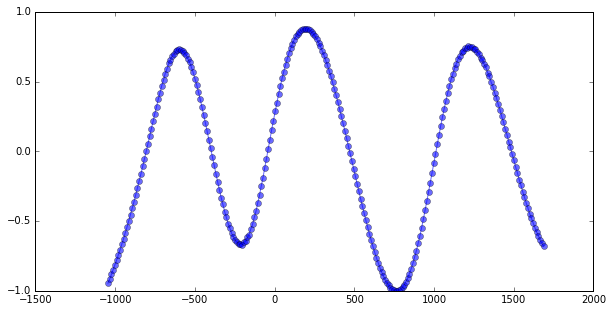

In [9]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ax.plot(*ttvs.get_ttv_plotting(obs), alpha=0.58, color="blue", marker="o")